In [40]:
import torch
import requests
import matplotlib.pyplot as plt

In [41]:
#iris data 다운로드

iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data', 'wb').write(r.content)

4551

In [42]:
vectors = [] # x값
answers = [] # y값

with open('iris.data', 'r') as f:
  for line in f:
    if len(line.strip()) != 0:
      items = line.strip().split(",")
      vectors.append([float(i) for i in items[:4]])
      answers.append(items[4])

print("Vector : {}, Answer : {}".format(vectors, answers))

Vector : [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], 

In [43]:
#tensor로 변형하고 학습시키기

X = torch.FloatTensor(vectors)
#X

#중심 옮기기 , 각각 차원에 있는 X에서 평균 빼기
#axis를 넣어줌으로 각각의 축의 평균을 구함
Z = X - X.mean(axis = 0)
Z

tensor([[-7.4333e-01,  4.4600e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01, -5.4000e-02, -2.3587e+00, -9.9867e-01],
        [-1.1433e+00,  1.4600e-01, -2.4587e+00, -9.9867e-01],
        [-1.2433e+00,  4.6000e-02, -2.2587e+00, -9.9867e-01],
        [-8.4333e-01,  5.4600e-01, -2.3587e+00, -9.9867e-01],
        [-4.4333e-01,  8.4600e-01, -2.0587e+00, -7.9867e-01],
        [-1.2433e+00,  3.4600e-01, -2.3587e+00, -8.9867e-01],
        [-8.4333e-01,  3.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.4433e+00, -1.5400e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01,  4.6000e-02, -2.2587e+00, -1.0987e+00],
        [-4.4333e-01,  6.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.0433e+00,  3.4600e-01, -2.1587e+00, -9.9867e-01],
        [-1.0433e+00, -5.4000e-02, -2.3587e+00, -1.0987e+00],
        [-1.5433e+00, -5.4000e-02, -2.6587e+00, -1.0987e+00],
        [-4.3333e-02,  9.4600e-01, -2.5587e+00, -9.9867e-01],
        [-1.4333e-01,  1.3460e+00, -2.2587e+00, -7.9867e-01],
        

In [56]:
#pytorch로 주성분 찾기(PC)
#방향벡터(w)를 움직여가면서 분산이 최대가 되는 부분을 찾음
#차원은 4->1로 바꿈

def findPC(Z):
  #print(dim)

  w = torch.randn(Z.shape[1])#4차원 vector가 생김
  w = w / (w**2).sum() ** 0.5 #단위벡터 생성

  lr = 0.1

  for epoch in range(100):
    w.requires_grad_(True)
    #cost = variance = 목적
    #variance = E(di ^ 2)
    #d == zi.w (벡터 투영) == (Z * w).sum(dim=1)
    variance = ((Z * w).sum(dim=1) ** 2).mean() #dim = 1 몇번째 줄을 기준으로 더할 것인가!

    #variance를 기준으로 편미분한 기울기
    variance.backward()
    with torch.no_grad():
      #cost를 최소화 하기 위해 grad의 반대방향으로 계산했으나 지금은 최대화 해야함
      w = w + lr * w.grad
      w = w / ((w ** 2).sum() ** 0.5)
      #if epoch % 10 == 0: print(variance.item())

  return w, variance

In [65]:
#각 점에 주성분에 해당하는 요소를 다 뻄
#PC의 법선벡터 = Zi - Zi'
#Zi' = (Zi.w) x w 
#내적~> matrix곱

def PCA(Z, n):
  W, V = [], []
  for _ in range(n):
    w, variance = findPC(Z)
    W.append(w.tolist())
    V.append(variance.item())
    #@ == 내적
    Z = Z - torch.mm(Z, w.unsqueeze(1)) * w

  return W, V

#PC1 을 x, PC2 를 y축으로 회전

def transform(Z, W):
  return Z @ torch.FloatTensor(W).T

W, V = PCA(Z, 4)
V

[4.196675777435303,
 0.2388375848531723,
 0.07122497260570526,
 0.0016311511863023043]

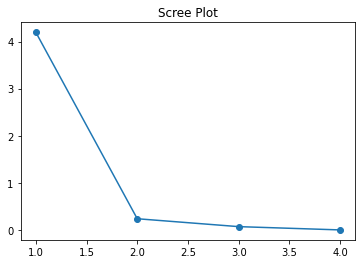

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


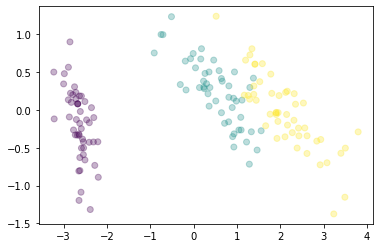

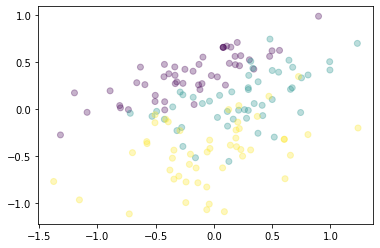

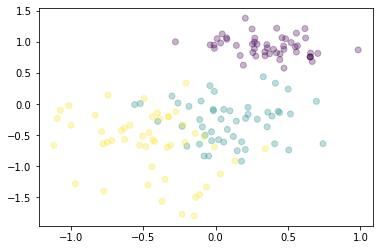

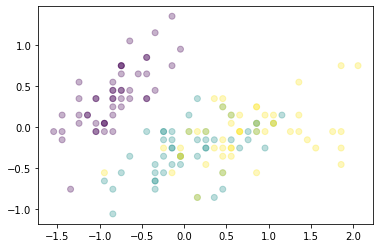

In [75]:
#시각화

plt.title("Scree Plot")
plt.plot(range(1, len(V) + 1), V, "o-") #1.0있는 부분만 봐도 된다...!
plt.show()

K = transform(Z, W)

spicies = {s : i for i, s in enumerate(set(answers))}
print(spicies)

plt.scatter(K[:,0], K[:,1], c=[spicies[a] for a in answers], alpha=0.3)
plt.show()
plt.scatter(K[:,1], K[:,2], c=[spicies[a] for a in answers], alpha=0.3) #주성분이 빠진 ver
plt.show()
plt.scatter(K[:,2], K[:,3], c=[spicies[a] for a in answers], alpha=0.3)
plt.show()
plt.scatter(Z[:,0], Z[:,1], c=[spicies[a] for a in answers], alpha=0.3) #기존 origin
plt.show()